_Created by V.Šugar_


# Biodiversity in National Parks


## 1 Introduction


Data is mostly fictional, provided by Codecademy.com. 

This project is one part of participation in 'Data Scientist: Analytics Career Path'. 


The goal is to analyze bidiversity and conservation status within four National Parks. Questions that this project aims to answer are:

- What is the distribution of conservation status for species?
- Are certain "Families" of species more likely to have endangered status?
- Which animal is most prevalent and what is their distribution amongst parks?
- What park has the most species that have some engegered status?

**Data sources:**

Both _Observations.csv_ and _Species_info.csv_ was provided by [Codecademy.com](https://www.codecademy.com).

## 2 Scoping

 Four sections were created below to help guide the project's process and progress. 
    
    
### Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. I will focus mostly on species endangerment, since this is vital to conservation efforts.

- How can we describe the distribution of species' endangerment? 
- How are endangered species threatened based on where they are located? Can we say anything about how certain climates affect species status?
- How have species been affected over time?
- Are different types of species endangered more than others?


### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations.

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

- Species distribution,
- Species count,
- Relationship between species,
- Conservation status of species,
- Observations of species in parks. 

### Evaluation

This section will reflect on what has been learned through the process, and if any of the questions were unable to be answered.

## 3 Loading, exploring and cleaning the Data

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

### Loading the Data

For analysis, I load the datasets into _DataFrames_, so it can be explored and visualized with Pandas(Python).

Data _Observations.csv_ and _Species_info.csv_ are read in as _obs_df_ and _species_ respectively.


In [2]:
obs_df = pd.read_csv('observations.csv')
obs_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [31]:
# The names of columns are:
print(obs_df.columns)
print(species.columns)

Index(['Latin name', 'National park', 'Number of visits (in a 7 days)'], dtype='object')
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


The _obs_df_ contains information on recorded sightings of different species throughout the national parks in the past 7 days. The columns are:

- **scientific_name** - The scientific name for each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

The _species_info.csv_ contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status, if there is aplicable

First, lets use better names on the columns.

### Editing data frames

In [4]:
obs_df = obs_df.rename(columns={'scientific_name': 'Latin name', 'park_name': 'National park', 'observations': 'Number of visits (in a 7 days)'})
species = species.rename(columns={'category': 'Taxonomy', 'scientific_name': 'Latin name', 'common_names': 'Common name', 'conservation_status': 'IUCN status'})

# The new names of columns are:
print(obs_df.columns)
print(species.columns)

Index(['Latin name', 'National park', 'Number of visits (in a 7 days)'], dtype='object')
Index(['Taxonomy', 'Latin name', 'Common name', 'IUCN status'], dtype='object')


In [5]:
# Now lets take out the 'National Park' postscript from the column 'National Park', "extra text".

# This is done to avoid modifying the original DataFrame in place. Changes made to the copy won't affect the original DataFrame.
obs_df = obs_df.copy() 

# Selecting the column 'National park' and with str.replace method replace it with an empty("") string.
obs_df['National park'] = obs_df["National park"].str.replace(' National Park', '')
obs_df

,Latin name,National park,Number of visits (in a 7 days)
0,Vicia benghalensis,Great Smoky Mountains,68
1,Neovison vison,Great Smoky Mountains,77
2,Prunus subcordata,Yosemite,138
3,Abutilon theophrasti,Bryce,84
4,Githopsis specularioides,Great Smoky Mountains,85
...,...,...,...
23291,Croton monanthogynus,Yosemite,173
23292,Otospermophilus beecheyi,Bryce,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce,140
23294,Dicranella rufescens,Yosemite,171


In [6]:
# Since, we will not be using "Common name"-s in this project, I will delete this column.

species = species.drop('Common name', axis=1)
print(species)

            Taxonomy                     Latin name IUCN status
0             Mammal  Clethrionomys gapperi gapperi         NaN
1             Mammal                      Bos bison         NaN
2             Mammal                     Bos taurus         NaN
3             Mammal                     Ovis aries         NaN
4             Mammal                 Cervus elaphus         NaN
...              ...                            ...         ...
5819  Vascular Plant               Solanum parishii         NaN
5820  Vascular Plant                  Solanum xanti         NaN
5821  Vascular Plant         Parthenocissus vitacea         NaN
5822  Vascular Plant              Vitis californica         NaN
5823  Vascular Plant            Tribulus terrestris         NaN

[5824 rows x 3 columns]


### Structure of the data

In [8]:
print(obs_df.describe())
print("")
print(species.describe())

       Number of visits (in a 7 days)
count                    23296.000000
mean                       142.287904
std                         69.890532
min                          9.000000
25%                         86.000000
50%                        124.000000
75%                        195.000000
max                        321.000000

              Taxonomy         Latin name         IUCN status
count             5824               5824                 191
unique               7               5541                   4
top     Vascular Plant  Castor canadensis  Species of Concern
freq              4470                  3                 161


In [9]:
# Lets see the shape of the data
print(f"species shape: {species.shape}")
print(f"observations shape: {obs_df.shape}")

species shape: (5824, 3)
observations shape: (23296, 3)


There are 5824 species in the 'species' dataframe. I'll inspect more if there are duplicates and missing values. In the 'obs_df' Dataframe is 23296 rows of species observation in a weekend visit within the parks.

### Data organising and cleaning

In the file _'species'_ we have missing values (NaN) in the column named "IUCN status".

We can see that the data has missing values, but we know that this is because these species does not face any threats --> **Structurally Missing Data (SMD)**. I'll change it to "Not threatened"!

In [10]:
species = species.fillna(value={'IUCN status':'Not threatened'})
species

,Taxonomy,Latin name,IUCN status
0,Mammal,Clethrionomys gapperi gapperi,Not threatened
1,Mammal,Bos bison,Not threatened
2,Mammal,Bos taurus,Not threatened
3,Mammal,Ovis aries,Not threatened
4,Mammal,Cervus elaphus,Not threatened
...,...,...,...
5819,Vascular Plant,Solanum parishii,Not threatened
5820,Vascular Plant,Solanum xanti,Not threatened
5821,Vascular Plant,Parthenocissus vitacea,Not threatened
5822,Vascular Plant,Vitis californica,Not threatened


In [11]:
# Checking for missing values

spec_all = len(species)
print('% Missing Data on All Data dataset:')
print((1 - species.count() / spec_all) * 100)

print("")
obs_all = len(obs_df)
print('% Missing Data on All Data dataset:')
print((1 - obs_df.count() / obs_all) * 100)

% Missing Data on All Data dataset:
Taxonomy       0.0
Latin name     0.0
IUCN status    0.0
dtype: float64

% Missing Data on All Data dataset:
Latin name                        0.0
National park                     0.0
Number of visits (in a 7 days)    0.0
dtype: float64


**Now, both Dataframes have no missing values!**

Lets look if there is some duplicates in both of the DataFrames

In [14]:
print("Duplicated values for the 'obs_df' and 'species' are:\n")
print("Duplicated values in the 'obs_df':\n", obs_df.duplicated().value_counts(), "\n")
print("Duplicated values in the 'species':\n", species.duplicated().value_counts(), "\n")
print("")

# Identify duplicate rows in 'obs_df'
duplicate_rows_obs = obs_df[obs_df.duplicated()]

# Display the duplicate rows
print("Duplicate Rows for 'obs_df': ")
print(duplicate_rows_obs)
print("")

# Identify duplicate rows in 'species'
duplicate_rows_spec = species[species.duplicated()]

# Display the duplicate rows
print("Duplicate Rows for 'species': ")
print(duplicate_rows_spec)
print("")

Duplicated values for the 'obs_df' and 'species' are:

Duplicated values in the 'obs_df':
 False    23281
True        15
Name: count, dtype: int64 

Duplicated values in the 'species':
 False    5543
True      281
Name: count, dtype: int64 


Duplicate Rows for 'obs_df': 
                   Latin name          National park  \
7263   Echinochloa crus-galli  Great Smoky Mountains   
8710    Streptopelia decaocto            Yellowstone   
10038          Plantago major  Great Smoky Mountains   
10674           Arctium minus               Yosemite   
12381    Eleocharis palustris  Great Smoky Mountains   
13372     Hesperis matronalis                  Bryce   
16741       Prunella vulgaris  Great Smoky Mountains   
17378    Potentilla norvegica               Yosemite   
17577      Spilogale putorius            Yellowstone   
18141           Poa compressa  Great Smoky Mountains   
19392       Cichorium intybus            Yellowstone   
20294  Botrychium virginianum            Yellowstone   

We have 15 duplicate rows in 'obs_df', 281 in 'species'.

#### Removing duplicated data

In [8]:
obs_no_dupl = obs_df.drop_duplicates()
species_no_dupl = species.drop_duplicates()

print(obs_no_dupl.describe())
print("")
print(species_no_dupl.describe())

       Number of visits (in a 7 days)
count                    23281.000000
mean                       142.280357
std                         69.885439
min                          9.000000
25%                         86.000000
50%                        124.000000
75%                        195.000000
max                        321.000000

              Taxonomy           Latin name         IUCN status
count             5543                 5543                 180
unique               7                 5541                   4
top     Vascular Plant  Oncorhynchus mykiss  Species of Concern
freq              4262                    2                 151


### Data Merging

In [66]:
# Merging the data on the 'Latin name' column
df = pd.merge(species_no_dupl,  obs_no_dupl, on='Latin name', how='inner')
df

,Taxonomy,Latin name,IUCN status,National park,Number of visits (in a 7 days)
0,Mammal,Clethrionomys gapperi gapperi,NaN,Bryce,130
1,Mammal,Clethrionomys gapperi gapperi,NaN,Yellowstone,270
2,Mammal,Clethrionomys gapperi gapperi,NaN,Great Smoky Mountains,98
3,Mammal,Clethrionomys gapperi gapperi,NaN,Yosemite,117
4,Mammal,Bos bison,NaN,Yosemite,128
...,...,...,...,...,...
23296,Vascular Plant,Vitis californica,NaN,Yellowstone,237
23297,Vascular Plant,Tribulus terrestris,NaN,Great Smoky Mountains,50
23298,Vascular Plant,Tribulus terrestris,NaN,Yellowstone,239
23299,Vascular Plant,Tribulus terrestris,NaN,Bryce,111


## Explore the Data

### Observations by park

In [21]:
print(f"Number of species: {species_no_dupl['Latin name'].nunique()}")

Number of species: 5541


The first thing is to find the number of distinct species in the data. There are 5,541 unique species. Next, issee the number of _Taxonomy_ that are represented in the data including animals and plants.

In [22]:
print(f"Number of categories: {species_no_dupl['Taxonomy'].nunique()}")

Number of categories: 7


In [23]:
species.groupby("Taxonomy").size()

Taxonomy
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Vascular plants are by far the largest share of species with 4,470 in the data with reptiles being the fewest with 79.

In [24]:
print(f"Number of conservation statuses: {species['IUCN status'].nunique()}")
print(f"Unique conservation statuses: {species['IUCN status'].unique()}")

Number of conservation statuses: 5
Unique conservation statuses: ['Not threatened' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']


Another column to explore is **IUCN status**. The column has 5 categories. 

In [25]:
print(species.groupby("IUCN status").size())

IUCN status
Endangered              16
In Recovery              4
Not threatened        5633
Species of Concern     161
Threatened              10
dtype: int64


There are 161 species of concern, 16 endangered, 10 threatened, and 4 in recovery. Other (5633) species have no conservation status, or the data about them is scarce.

Total number of visits (in a weekend) in four different parks: 

           National park  Number of visits (in a 7 days)
0                  Bryce                          576195
1  Great Smoky Mountains                          431537
2            Yellowstone                         1443016
3               Yosemite                          863209


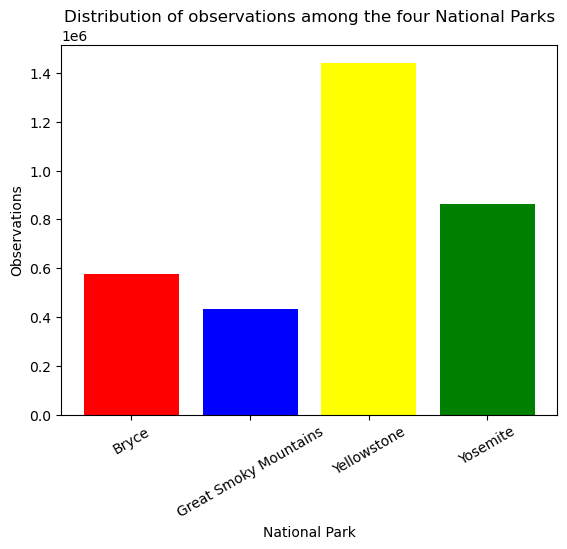

In [32]:
# Lets analyze the distribution of observations across different national parks,
# and identify the parks with the highest and lowest biodiversity based on the number of observations

print("Total number of visits (in a weekend) in four different parks: ")
print("")
obs_distribution = df.groupby('National park')['Number of visits (in a 7 days)'].sum().reset_index()
print(obs_distribution)


all_colors = ['red', 'blue', 'yellow', 'green']

plt.bar(obs_distribution['National park'], obs_distribution['Number of visits (in a 7 days)'], color=all_colors)
plt.title('Distribution of observations among the four National Parks')
plt.xticks(rotation = 30)
plt.xlabel('National Park')
plt.ylabel('Observations')
plt.show()

In [16]:
species_by_park = pd.pivot_table(df, values='Latin name', index='National park', aggfunc='count').reset_index()
species_by_park

,National park,Latin name
0,Bryce,5828
1,Great Smoky Mountains,5823
2,Yellowstone,5824
3,Yosemite,5826


This was to make sure if there were different species among parks. Aparently, the same species diversity (~5825 species) are present in all four parks.

#### Observations

Now we look at **observations** data. The first task is to check the number of parks that are in the dataset.

In [36]:
print(f"Number of parks: {obs_df['National park'].nunique()}")
print(f"Unique parks:{obs_df['National park'].unique()}")

Number of parks: 4
Unique parks:['Great Smoky Mountains' 'Yosemite' 'Bryce' 'Yellowstone']


Here are the total number of observations logged in the parks: 3,314,739 sightings in the last 7 days.A lot of observations for just a weekend! 

In [38]:
print(f"Number of observations: {obs_df['Number of visits (in a 7 days)'].sum()}")

Number of observations: 3314739


In [17]:
## Lets explore the different categories of species and their distribution across parks

tax_obs = df.groupby('Taxonomy')['Number of visits (in a 7 days)'].sum().reset_index()
display(tax_obs)

,Taxonomy,Number of visits (in a 7 days)
0,Amphibian,43971
1,Bird,292578
2,Fish,71631
3,Mammal,117155
4,Nonvascular Plant,190653
5,Reptile,44678
6,Vascular Plant,2553291


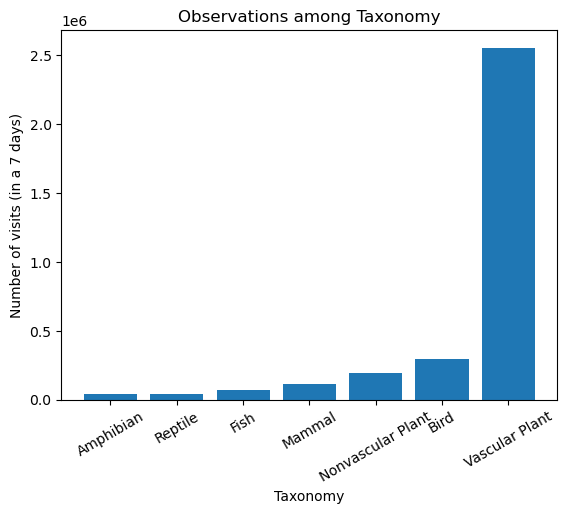

In [20]:
plt.bar('Taxonomy', 'Number of visits (in a 7 days)', data=tax_obs.sort_values('Number of visits (in a 7 days)'))
ax = plt.subplot()
ax.set_xlabel('Taxonomy')
ax.set_ylabel('Number of visits (in a 7 days)')
plt.title('Observations among Taxonomy')
plt.xticks(rotation=30)
plt.show()

In [22]:
bryce_tax= df[df['National park'] == 'Bryce'].groupby('Taxonomy')['Number of visits (in a 7 days)'].sum().reset_index()

greatsmoky_tax = df[df['National park'] == 'Great Smoky Mountains'].groupby('Taxonomy')['Number of visits (in a 7 days)'].sum().reset_index()

yellowstone_tax = df[df['National park'] == 'Yellowstone'].groupby('Taxonomy')['Number of visits (in a 7 days)'].sum().reset_index()

yosemite_tax = df[df['National park'] == 'Yosemite'].groupby('Taxonomy')['Number of visits (in a 7 days)'].sum().reset_index()

all_tax_df = pd.concat([
    bryce_tax.assign(Park='Bryce'),
    greatsmoky_tax.assign(Park='Great Smoky Mountains'),
    yellowstone_tax.assign(Park='Yellowstone'),
    yosemite_tax.assign(Park='Yosemite')
])

all_tax_df

,Taxonomy,Number of visits (in a 7 days),Park
0,Amphibian,7380,Bryce
1,Bird,51647,Bryce
2,Fish,12587,Bryce
3,Mammal,20680,Bryce
4,Nonvascular Plant,32992,Bryce
5,Reptile,7950,Bryce
6,Vascular Plant,442959,Bryce
0,Amphibian,5707,Great Smoky Mountains
1,Bird,37728,Great Smoky Mountains
2,Fish,9306,Great Smoky Mountains


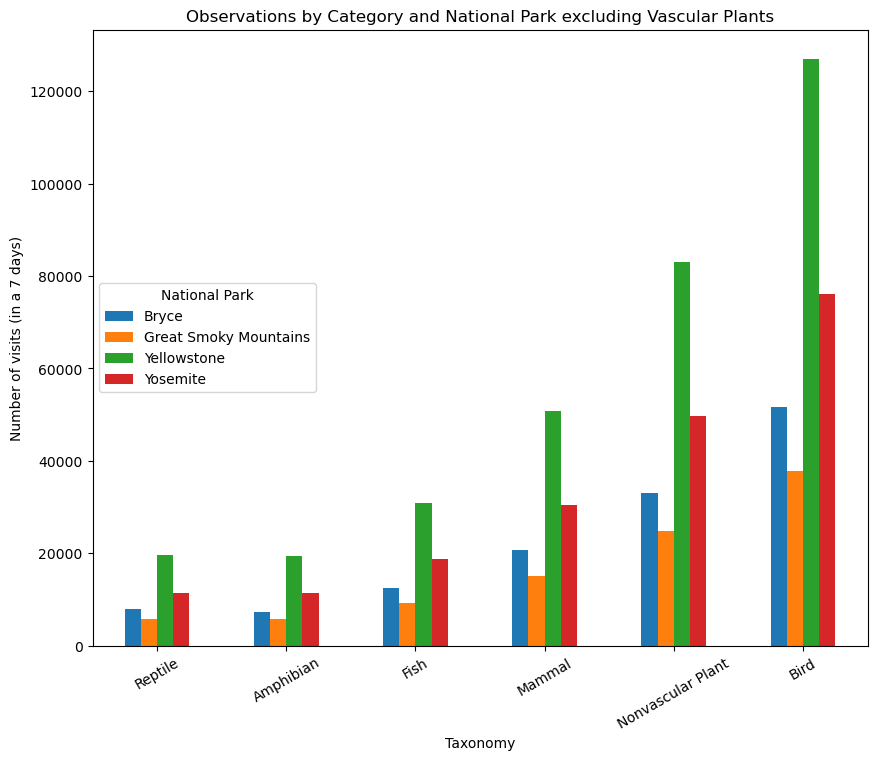

In [24]:
# Since vascular plants observations are much higher than the rest, I will divide 'all_tax_df' into 2 DataFrames, 
# one excluding vascular plants but including all the other categories, and the reverse

all_tax_exclud_vascular_plants = all_tax_df[all_tax_df['Taxonomy'] != 'Vascular Plant']

pivot_df = all_tax_exclud_vascular_plants.pivot(index='Taxonomy', columns='Park', values='Number of visits (in a 7 days)')
pivot_df = pivot_df.sort_values('Great Smoky Mountains')
ax = pivot_df.plot(kind='bar', figsize=(10, 8))
ax.set_xlabel('Taxonomy')
ax.set_ylabel('Number of visits (in a 7 days)')
ax.set_title('Observations by Category and National Park excluding Vascular Plants')
ax.legend(title='National Park', loc=6)
plt.xticks(rotation = 30)
plt.show()

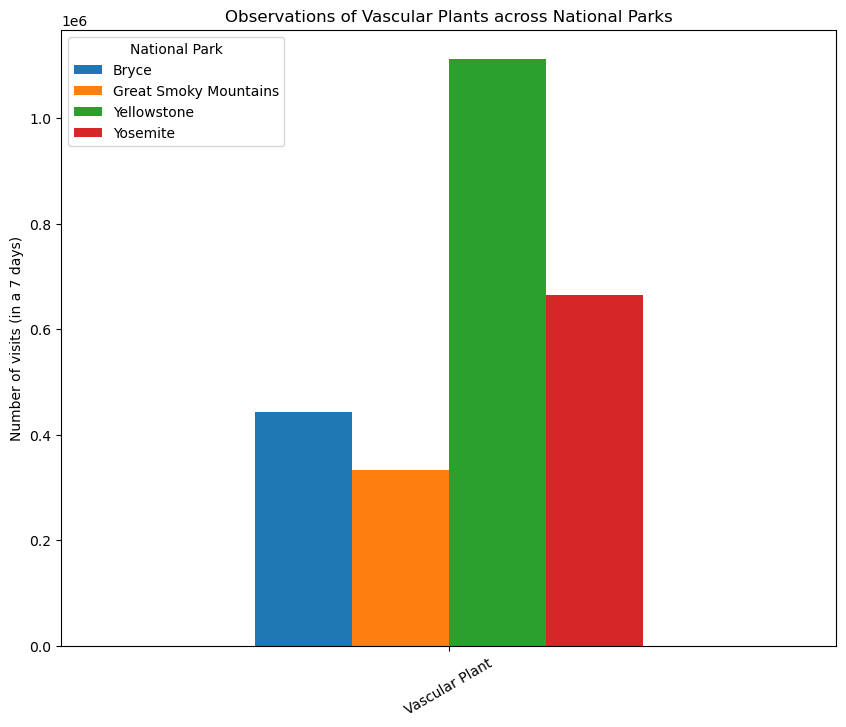

In [26]:
vascular_plants_df = all_tax_df[all_tax_df['Taxonomy'] == 'Vascular Plant']

pivot_df = vascular_plants_df.pivot(index='Taxonomy', columns='Park', values='Number of visits (in a 7 days)')
ax = pivot_df.plot(kind='bar', figsize=(10, 8))
ax.set_xlabel('')
ax.set_ylabel('Number of visits (in a 7 days)')
ax.set_title('Observations of Vascular Plants across National Parks')
ax.legend(title='National Park', loc=2)
plt.xticks(rotation = 30)
plt.show()

In [27]:
# Lets investigate the most and least common species in the dataset.

obs_by_lat_name = df.groupby(['Latin name'])['Number of visits (in a 7 days)'].sum().reset_index()

least_comm_spec = (obs_by_lat_name[obs_by_lat_name['Number of visits (in a 7 days)'] == obs_by_lat_name['Number of visits (in a 7 days)'].min()].iloc[0]['Latin name'])                                       

most_comm_spec = (obs_by_lat_name[obs_by_lat_name['Number of visits (in a 7 days)'] == obs_by_lat_name['Number of visits (in a 7 days)'].max()].iloc[0]['Latin name'])


least_comm_spec_obs = obs_by_lat_name[obs_by_lat_name['Latin name'] == least_comm_spec]['Number of visits (in a 7 days)'].squeeze()
most_comm_spec_obs = obs_by_lat_name[obs_by_lat_name['Latin name'] == most_comm_spec]['Number of visits (in a 7 days)'].squeeze()

print(f"The least common species is '{least_comm_spec}' with {least_comm_spec_obs} observations, and the most common species is \n'{most_comm_spec}' with {most_comm_spec_obs} observations.")

The least common species is 'Grus americana' with 131 observations, and the most common species is 
'Holcus lanatus' with 1780 observations.


## Analysis

This section will begin to analyse the data after the initial exploration. First task will be to explore the **IUCN_status** column in 'species'. 

The column 'IUCN status' has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range
- `Not threatened`: have no conservation status, or the data about them is scarce.

In [50]:
species.groupby("IUCN status").size()

IUCN status
Endangered              16
In Recovery              4
Not threatened        5633
Species of Concern     161
Threatened              10
dtype: int64

Next is to checkout the different categories that are nested in the **IUCN status** column except for the ones that do not require an intervention. There is both the table and chart to explore below.

### Number of species with conservation status

In [29]:
cons_tax = species[species['IUCN status'] != 'Not threatened']\
    .groupby(['IUCN status', "Taxonomy"])['Latin name'].count().unstack()

cons_tax

Taxonomy,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
IUCN status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


For those in the **Endangered** status, 7 were mammals and 4 were birds. In the **In Recovery** status, there were 3 birds and 1 mammal, which could possibly mean that the birds are bouncing back more than the mammals. 

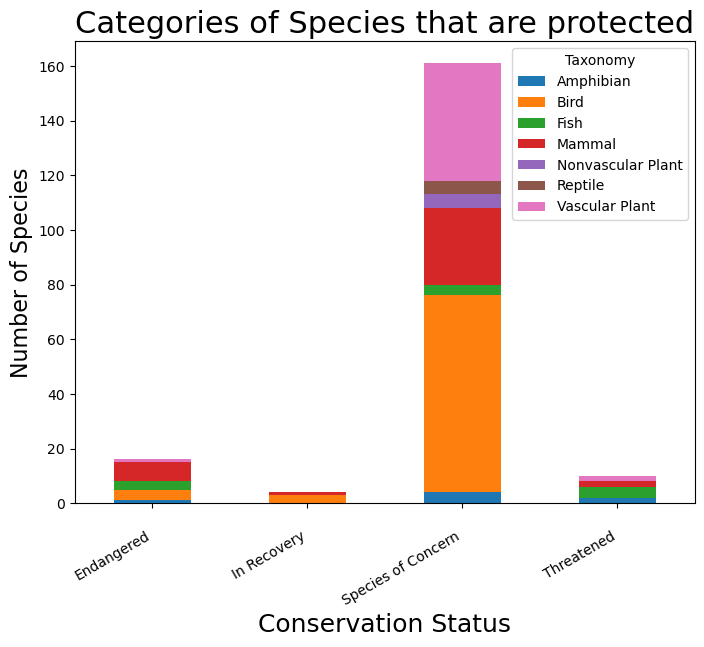

In [30]:
ax = cons_tax.plot(kind = 'bar', figsize=(8,6), stacked=True)

ax.set_xlabel("Conservation Status", size=18)
ax.set_ylabel("Number of Species", size=16);
ax.set_title("Categories of Species that are protected", size = 22)
plt.xticks(rotation=30, ha="right")
ax.tick_params(axis='x', which='major', pad=15)

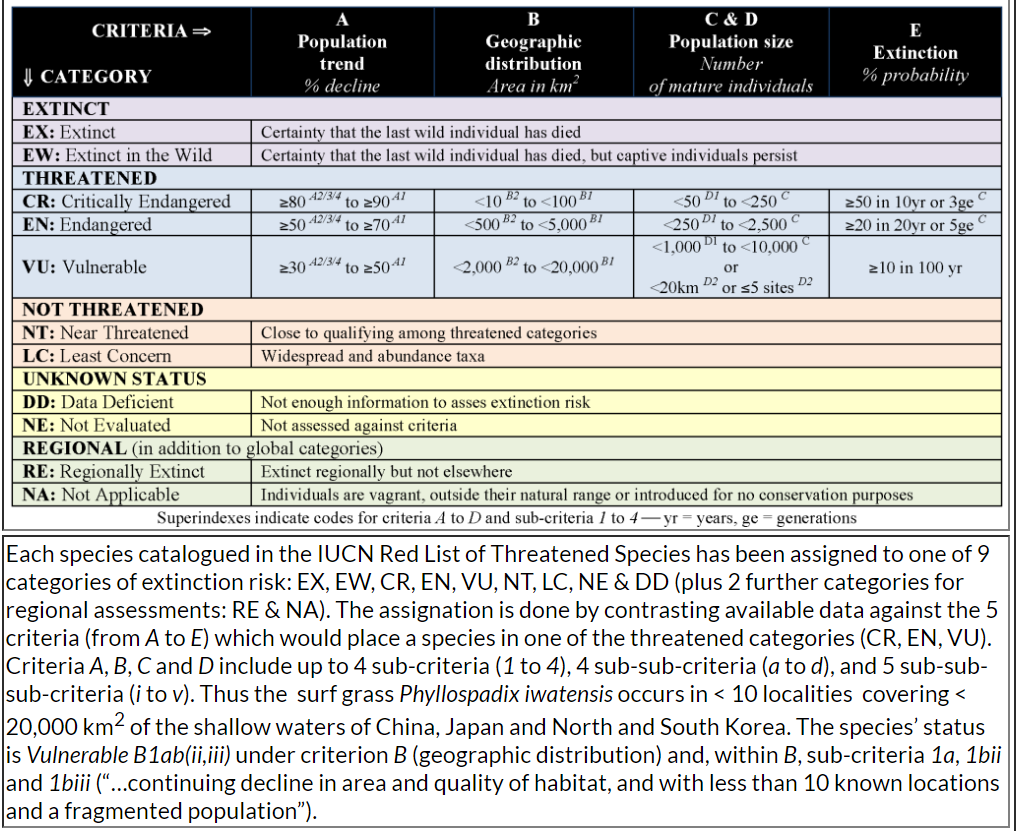

In [53]:
print(species.groupby("IUCN status").size())

IUCN status
Endangered             15
In Recovery             4
Species of Concern    151
Threatened             10
dtype: int64


### Endangered Species by Park

Since from he last graph we don't see much, we need another type of approach.
Lets see how many species possess - no, low and high endangerment level (no, low or high extinction risk) in each park.

In [50]:
# Lets strip out all the species that aren't endangered--it makes the data hard to read, and we'll express
#   the quantities of endangered sightings in terms of percentages of total sightings, so no data will be lost.

df_endangered = df[df['IUCN status'] != 'Not threatened']

df['National park'] = df['National park'].astype(str)

observations_endangered = df.groupby(["National park", "IUCN status"])\
    ["Number of visits (in a 7 days)"].sum().unstack()

# Merge the DataFrames
observations_endangered_merged = pd.merge(
    observations_endangered,
    df_endangered,
    left_on="National park",
    right_on="National park",
    how="inner"
)

observations_endangered_merged

,National park,Endangered,In Recovery,Species of Concern,Threatened,Taxonomy,Latin name,IUCN status,Number of visits (in a 7 days)
0,Bryce,489,388,14925,591,Mammal,Clethrionomys gapperi gapperi,NaN,130
1,Bryce,489,388,14925,591,Mammal,Bos bison,NaN,68
2,Bryce,489,388,14925,591,Mammal,Bos taurus,NaN,99
3,Bryce,489,388,14925,591,Mammal,Ovis aries,NaN,119
4,Bryce,489,388,14925,591,Mammal,Cervus elaphus,NaN,96
...,...,...,...,...,...,...,...,...,...
23296,Yosemite,747,582,21551,849,Vascular Plant,Solanum parishii,NaN,162
23297,Yosemite,747,582,21551,849,Vascular Plant,Solanum xanti,NaN,150
23298,Yosemite,747,582,21551,849,Vascular Plant,Parthenocissus vitacea,NaN,156
23299,Yosemite,747,582,21551,849,Vascular Plant,Vitis californica,NaN,164


In [54]:
enden_species_by_park = pd.pivot_table(observations_endangered_merged, values=['Endangered', 'In Recovery', 'Species of Concern'], index='Taxonomy', aggfunc='count').reset_index()
enden_species_by_park

,Taxonomy,Endangered,In Recovery,Species of Concern
0,Amphibian,320,320,320
1,Bird,2083,2083,2083
2,Fish,516,516,516
3,Mammal,867,867,867
4,Nonvascular Plant,1332,1332,1332
5,Reptile,316,316,316
6,Vascular Plant,17867,17867,17867


In [ ]:
We see that Birds have a lot of species that are unders some level of protection.

## Which category of species is most protected?

In [69]:
# Lets create a new column called 'protected' that holds all species that are protected. 

df['protected'] = df['IUCN status'].notna()
df

,Taxonomy,Latin name,IUCN status,National park,Number of visits (in a 7 days),protected
0,Mammal,Clethrionomys gapperi gapperi,NaN,Bryce,130,False
1,Mammal,Clethrionomys gapperi gapperi,NaN,Yellowstone,270,False
2,Mammal,Clethrionomys gapperi gapperi,NaN,Great Smoky Mountains,98,False
3,Mammal,Clethrionomys gapperi gapperi,NaN,Yosemite,117,False
4,Mammal,Bos bison,NaN,Yosemite,128,False
...,...,...,...,...,...,...
23296,Vascular Plant,Vitis californica,NaN,Yellowstone,237,False
23297,Vascular Plant,Tribulus terrestris,NaN,Great Smoky Mountains,50,False
23298,Vascular Plant,Tribulus terrestris,NaN,Yellowstone,239,False
23299,Vascular Plant,Tribulus terrestris,NaN,Bryce,111,False


In [115]:
category_counts = df.groupby(['Taxonomy', 'protected'])['Latin name'].nunique().reset_index()
category_counts

,Taxonomy,protected,Latin name
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,115
5,Fish,True,11
6,Mammal,False,146
7,Mammal,True,30
8,Nonvascular Plant,False,328
9,Nonvascular Plant,True,5


In [116]:
# Pivot the table
category_counts_pivot = category_counts.pivot(index='Taxonomy', columns='protected', values='Latin name').reset_index()
category_counts_pivot

protected,Taxonomy,False,True
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


**So, the largest percentage of protected species are:**

- Mammals have 17%,,
- Birds have 15%,
- Plants, only 2.5%.

In [117]:
conservation_category = pd.pivot_table(
        df[df["IUCN status"] != "Least Concern"],
        values='Latin name',
        index='IUCN status', 
        columns='Taxonomy',
        aggfunc=pd.Series.count
        )
    
conservation_category

Taxonomy,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
IUCN status,,,,,,,
Endangered,4.0,16.0,12.0,32.0,NaN,NaN,4.0
In Recovery,NaN,12.0,NaN,12.0,NaN,NaN,NaN
Species of Concern,16.0,288.0,16.0,112.0,20.0,20.0,172.0
Threatened,8.0,NaN,20.0,8.0,NaN,NaN,8.0


### What is the distribution of conservation status for animals?

In [129]:
# Lets create a new df for animal species only  

animal_species = species[species['Taxonomy'].str.contains('Plant') == False]
print(animal_species['Taxonomy'].value_counts())

print("")
animal_species

Taxonomy
Bird         521
Mammal       214
Fish         127
Amphibian     80
Reptile       79
Name: count, dtype: int64



,Taxonomy,Latin name,IUCN status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,NaN,False
1,Mammal,Bos bison,NaN,False
2,Mammal,Bos taurus,NaN,False
3,Mammal,Ovis aries,NaN,False
4,Mammal,Cervus elaphus,NaN,False
...,...,...,...,...
4610,Fish,Mylopharodon conocephalus,NaN,False
4611,Fish,Ptychocheilus grandis,NaN,False
4612,Fish,Oncorhynchus clarkii henshawi,Threatened,False
4613,Fish,Oncorhynchus mykiss aguabonita,NaN,False


#### Species in Parks

The next set of analysis will come from data, as conservationists have been recording sightings of different species at several national parks for the past 7 days.

The first step is to look at the the 'common names' from _species_ to get an idea of the most prevalent animals in the dataset. The data will be need to be split up into individual names. 

In [134]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [135]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

The next step is to clean up duplicate words in each row since they should no be counted more than once per species.

In [13]:
clean_rows = []

for item in common_names:
    item = list(dict.fromkeys(item))
    clean_rows.append(item)
    
clean_rows[:10]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer'],
 ['Feral', 'Hog', 'Wild', 'Pig'],
 ['Coyote'],
 ['Gray', 'Wolf'],
 ['Red', 'Wolf']]

Next, the words need to be collapsed into one list for easier use.

In [14]:
flat_list = [item for sublist in clean_rows for item in sublist]

print(flat_list[:10])

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated']


Now the data is ready to be able to count the number of occurrences of each word.

In [39]:
words_counted = []

for i in res:
    x = flat_list.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
176,Bat,23
1,Shrew,18
77,Myotis,17
69,Mouse,16
137,Chipmunk,13
149,American,12
44,Squirrel,12
190,Eastern,11
20,Vole,11
36,Western,10


From this analysis, it seems that **Bat* occurred 23 times while **Shrew** came up 18 times. 

Lets see, what bats can say. In the data, there are several different scientific names for different types of bats. The next task is to figure out which rows of 'species' are referring to the bats. A new column (is_bat) will be created to check if (boolean) value is 'True'.

In [40]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,False
1,Mammal,Bos bison,"American Bison, Bison",NaN,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN,False
7,Mammal,Canis latrans,Coyote,Species of Concern,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,False
9,Mammal,Canis rufus,Red Wolf,Endangered,False


In [25]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


There seems to be a lot of species of bats and a mix of protected vs. non-protected species (50/50). 

Next, the results of the bat species will be merged with *observations* to create a DataFrame with observations of bats across the four National parks.  

In [42]:
obs_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [8]:
# Lets group 'park_name' and get the 10 rows with the highest 'observations' in each group

high_observations = obs_df.groupby('park_name').apply(lambda x: x.sort_values(by='observations', ascending=False).head(10)).reset_index(drop=True)
high_observations

,scientific_name,park_name,observations
0,Valerianella radiata,Bryce National Park,176
1,Melilotus indica,Bryce National Park,173
2,Ericameria bloomeri,Bryce National Park,172
3,Martes americana,Bryce National Park,167
4,Draba oligosperma,Bryce National Park,167
5,Bubulcus ibis,Bryce National Park,164
6,Avena sativa,Bryce National Park,163
7,Trillium simile,Bryce National Park,162
8,Nyctanassa violacea,Bryce National Park,160
9,Ophioglossum vulgatum,Bryce National Park,160


In [43]:
bat_observations = obs_df.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,NaN,True
...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True


Let's see the total of bat observations(across all species) that were made at each National park.  
The total number of bats observed in each park over the past 7 days are in the table below.  

In [46]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Yellowstone National Park seems to have the largest, with 8,362 observations and the Great Smoky Mountains National Park having the lowest, with 2,411.

Now let's see each park broken down by protected bats vs. non-protected bat sightings.

In [28]:
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


It seems that every park, except for the Great Smoky Mountains National Park, has more sightings of protected bats than not. This could be considered a great sign for bats.

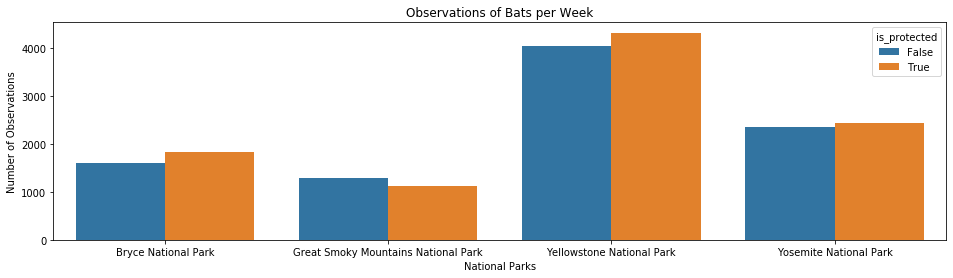

In [29]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

From this chart we can see that Yellowstone and Yosemite National Parks seem to be doing a great job with their bat populations, since there are more sightings of protected bats compared to non-protected species. The Great Smoky Mountains National Park might need to beef up there efforts in conservation, as they have seen more non-protected species.

#### How many elk are there in National parks ?

In [47]:
# Lets create a dataframe with elk species

species['is_elk'] = (species.common_names.str.contains("Elk|elk") & (species.category == "Mammal"))
print("There are " + str(sum(species.is_elk)) + " different elk species.")

There are 3 different elk species.


In [50]:
elk_observations = obs_df.merge(species[species.is_elk])
print(elk_observations.head(20))

   scientific_name                            park_name  observations  \
0      Alces alces               Yosemite National Park           161   
1      Alces alces            Yellowstone National Park           197   
2      Alces alces                  Bryce National Park           101   
3      Alces alces  Great Smoky Mountains National Park            44   
4   Cervus elaphus            Yellowstone National Park           225   
5   Cervus elaphus            Yellowstone National Park           225   
6   Cervus elaphus            Yellowstone National Park           270   
7   Cervus elaphus            Yellowstone National Park           270   
8   Cervus elaphus  Great Smoky Mountains National Park            60   
9   Cervus elaphus  Great Smoky Mountains National Park            60   
10  Cervus elaphus               Yosemite National Park           203   
11  Cervus elaphus               Yosemite National Park           203   
12  Cervus elaphus  Great Smoky Mountains National 

In [51]:
elk_by_park = elk_observations.groupby('park_name').observations.sum().reset_index()
print(elk_by_park)

                             park_name  observations
0                  Bryce National Park           467
1  Great Smoky Mountains National Park           366
2            Yellowstone National Park          1187
3               Yosemite National Park           919


In [52]:
print("There are " + str(sum(elk_observations.observations)) + " Elk observed each week at these 4 National Parks.")

There are 2939 Elk observed each week at these 4 National Parks.


In [56]:
species['is_elk'] = (species.common_names.str.contains(r"[eE]lk")) & (species.category == "Mammal")
species[species.is_elk]

,category,scientific_name,common_names,conservation_status,is_bat,is_elk
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN,False,True
3015,Mammal,Alces alces,"Eurasian Elk, Moose",NaN,False,True
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN,False,True


**There are only 3 elk species in the National Parks, and none of them are endangered.**

In [58]:
elk_observed = obs_df.merge(species[species.is_elk])
elk_observed

,scientific_name,park_name,observations,category,common_names,conservation_status,is_bat,is_elk
0,Alces alces,Yosemite National Park,161,Mammal,"Eurasian Elk, Moose",NaN,False,True
1,Alces alces,Yellowstone National Park,197,Mammal,"Eurasian Elk, Moose",NaN,False,True
2,Alces alces,Bryce National Park,101,Mammal,"Eurasian Elk, Moose",NaN,False,True
3,Alces alces,Great Smoky Mountains National Park,44,Mammal,"Eurasian Elk, Moose",NaN,False,True
4,Cervus elaphus,Yellowstone National Park,225,Mammal,Wapiti Or Elk,NaN,False,True
5,Cervus elaphus,Yellowstone National Park,225,Mammal,Rocky Mountain Elk,NaN,False,True
6,Cervus elaphus,Yellowstone National Park,270,Mammal,Wapiti Or Elk,NaN,False,True
7,Cervus elaphus,Yellowstone National Park,270,Mammal,Rocky Mountain Elk,NaN,False,True
8,Cervus elaphus,Great Smoky Mountains National Park,60,Mammal,Wapiti Or Elk,NaN,False,True
9,Cervus elaphus,Great Smoky Mountains National Park,60,Mammal,Rocky Mountain Elk,NaN,False,True


C:\Users\Vedran\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedran\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedran\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedran\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

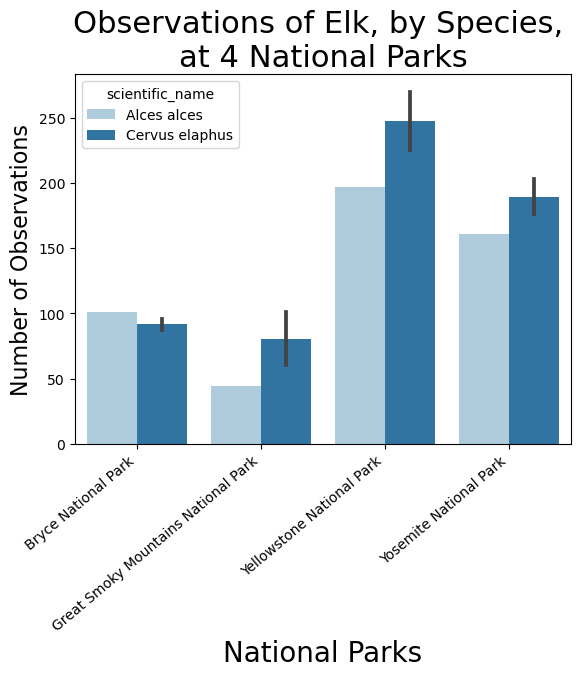

In [59]:
plt.figure()
elk_observed.sort_values('park_name', ascending = True, inplace= True)

f = sns.barplot(data=elk_observed, y="observations", x="park_name", hue='scientific_name', palette="Paired")
plt.setp(f.get_xticklabels(), rotation=90)
plt.title("Observations of Elk, by Species, \nat 4 National Parks", size = 22)
plt.ylabel('Number of Observations', size = 16)
plt.xlabel('National Parks', size = 20)
plt.xticks(rotation=40, ha="right")
plt.show()

Most elk are observed at Yellowstone and Yosemite National Parks (more than double of what is observed at Bryce and Great Smoky Mountains National Parks.

So, the questions that I am trying answer to-mentioned in Introduction
1. What is the distribution of conservation status for species?
2. Are certain "Families" of species more likely to have endangered status?
3. Which animal is most prevalent and what is their distribution amongst parks?
1. What park has the most species that have some engegered status?

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

We are able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species have no conservation status. Species of bats are founf to be very diverse and mostly under some level of conservation status. 
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While Mammals and Birds did not have significant difference in conservation percentage, Mammals and Reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - Study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.


Regarding the quantity of species in each category, the vast majority belong to the vascular plants category, followed by birds, nonvascular plants, mammals, fishes, reptiles, and amphibians. If we look at the distribution by parks, the same order is maintained in each park. However, examining the graph 'Observations by Category and National Park excluding Vascular Plants' a similar number of reptiles and amphibians is observed in the Great Smoky Mountains National Park. As mentioned before, the least common species is 'Grus americana' with 131 observations, and the most common species is 'Holcus lanatus' with 1780 observations.

In relation to the conservation status, with around 97% of the data missing or not needed, an analysis has been conducted using the available data. From this analysis, it is observed that the majority of species with conservation status available fall into the 'Species of Concern' category, where at least one individual of each species is present, especially among birds, vascular plants, and mammals. In the 'Endangered' category, there are records of mammals, birds, fishes, vascular plants, and amphibians, in that order. Under 'Threatened,' there are records primarily for fishes but also for vascular plants, mammals, and amphibians. 'Recovery' includes only two types of animals: mammals and birds.

## Further Research 

This dataset only included observations from the last 7 days which prohibits analyze changes over time. It would be curious to see how the conservation status for various species changes over time. 
Another piece that is missing is the Area of each park, it can be assumed that Yellowstone National Park might be much larger than the other parks which would mean that it would exhibit more observations and greater biodiversity. 
Lastly, if precise locations were recorded, the spatial distribution of the species could also be observed and test if these observations are spatially clustered. 